Import modules needed for assignment 13.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

First, we will create a Dataframe in order to view the data we will be working with.  We will be using several columns which will be renamed to make it easier to understand.

In [2]:
mushroom_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,3,5,9,21], names=['Edible', 'Cap Color', 'Odor', 'Gill Color', 'Population'])
mushroom_data.head()

,Edible,Cap Color,Odor,Gill Color,Population
0,p,n,p,k,s
1,e,y,a,k,n
2,e,w,l,n,n
3,p,w,p,n,s
4,e,g,n,k,a


In order to make this data easier to use, we'll need to replace the letters returned in the data with numerical values.  The scale will be as follows:

'Edible' column: edible(e) = 0 and poisonous(p) = 1

'Cap Color' column: brown(n) = 0, buff(b) = 1, cinnamon(c) = 2, gray(g) = 3, green(r) = 4, pink(p) = 5, purple(u) = 6, red(e) = 7, white(w) = 8, yellow(y) = 9

'Odor' column: almond(a) = 0, anise(l) = 1, creosote(c) = 2, fishy(y) = 3, foul(f) = 4, musty(m) = 5, none(n) = 6, pungent(p) = 7, spicy(s) = 8

'Gill Color' column: black(k) = 0, brown(n) = 1, buff(b) = 2, chocolate(h) = 3, gray(g) = 4, green(r) = 5, orange(o) = 6, pink(p) = 7, purple(u) = 8, red(e) = 9, white(w) = 10, yellow(y) = 11

'Population' column: abundant(a) = 0, clustered(c) = 1, numerous(n) = 2, scattered(s) = 3, several(v) = 4, solitary(y) = 5


In [3]:
mushroom_data.replace(to_replace={'Edible':{'p': 1, 'e': 0}}, inplace=True)
mushroom_data.replace(to_replace={'Cap Color':{'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}}, inplace=True)
mushroom_data.replace(to_replace={'Odor':{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
mushroom_data.replace(to_replace={'Gill Color':{'k':0, 'n':1, 'b':2, 'h':3, 'g':4, 'r':5, 'o':6, 'p':7, 'u':8, 'e':9, 'w':10, 'y':11}}, inplace=True)
mushroom_data.replace(to_replace={'Population':{'a':0, 'c':1, 'n':2, 's':3, 'v':4, 'y':5}}, inplace=True)

How does the new numeric table look? Is it easier to understand?

In [4]:
mushroom_data.head()

,Edible,Cap Color,Odor,Gill Color,Population
0,1,0,7,0,3
1,0,9,0,0,2
2,0,8,1,1,2
3,1,8,7,1,3
4,0,3,6,0,0


Let's plot out some of our results and see what we can discover about mushrooms!

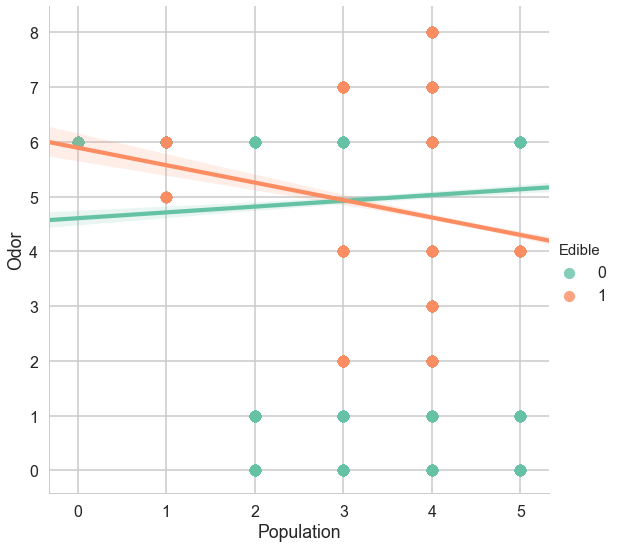

In [5]:
sns.set(style='whitegrid', context='poster')
palette = sns.color_palette('Set2', 10)
mushroom = sns.lmplot(hue='Edible', x='Population', y='Odor', data=mushroom_data, palette=palette, size=8)
mushroom.set_axis_labels('Population', 'Odor')

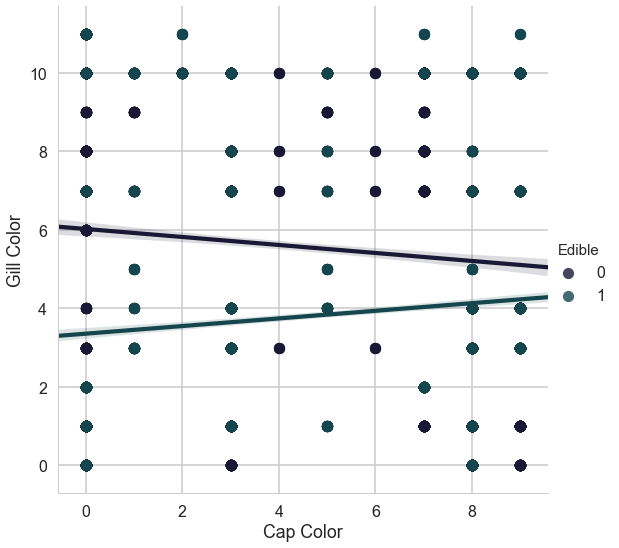

In [6]:
sns.set(style='whitegrid', context='poster')
palette = sns.color_palette('cubehelix', 8)
mushroom = sns.lmplot(hue='Edible', x='Cap Color', y='Gill Color', data=mushroom_data, palette=palette, size=8)
mushroom.set_axis_labels('Cap Color', 'Gill Color')

We can determine from this information that if a mushroom has an odor of almond, anise, or none.  Some Gill and Cap Colors are safe to eat, but that wouldn't be the best determining factor as there is much overlap in categories.